In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
#Sciezki do folderow
folder = '../Zdjecia/Baza_zdjec_konwersja_64x64/s'
folder_docelowy = '../../Dane/Zlaczone_kolumny_probki/'
slesh = '/'
png = '.png'

In [4]:
#Tablica przechowująca zdjęcia osób
train_ppl = []
for i in range(1,34):
    images = []
    for j in range(1,141):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    train_ppl.append(images)

valid_ppl = []    
for i in range(33,37):
    images_1 = []
    for j in range(1,141):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images_1.append(arr_im) 
    valid_ppl.append(images_1) 
    
    
test_ppl = []    
for i in range(37,41):
    images_2 = []
    for j in range(1,141):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images_2.append(arr_im) 
    test_ppl.append(images_2) 
    

In [5]:
w, h = 64, 128
data = np.zeros((h, w), dtype=np.uint8)

In [6]:
#Laczna ilosc zdjec
lacznie = 25200

train = int(0.8*lacznie)      # 80% próbek jest treningowych

valid = int(0.1*lacznie)        # 10% próbek jest testowych

test = int(0.1*lacznie)        # 10% próbek jest testowych

In [7]:
#############################
##### Zbior treningowy  #####
#############################

In [8]:
ilosc = 40
rozmiar = 10
train_img = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab_train = np.zeros(train, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy+'Train/'
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Tworzenie probek treningowych - pozytywne
    
#Petla przechodzi po ludziach
for i in range(0,32):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                     
                data = np.concatenate((train_ppl[i][j+l], train_ppl[i][9-k+l]), axis=0)

                #Zapisanie utworzonej probki
                con = Image.fromarray(data)
                con.save(newpath+str(n)+png) 
      
                train_img.append(con)
                tab_train[n] = 1
                n = n + 1   
print(n)

10080


In [9]:
#Tworzenie próbek treningowych - negatywne

x = 0 #Licznik 

m = 33
rozne = []


for i in range(32):

    rand_1 = random.randint(0,8)
    rand_2 = random.randint(0,8)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
        
                          
                data = np.concatenate((train_ppl[i][10*rand_1+j], train_ppl[i+k][10*rand_2+l]), axis=0)      
                con = Image.fromarray(data)
                            
                x = x + 1
                rozne.append(con)
print(x)

49600


In [10]:
#Losowanie 10080 probek negatywnych 
for i in range(train - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(newpath+str(n)+png) 
    
    train_img.append(con)
    
    tab_train[n] = 0
    n = n + 1
    
print(n)   

20160


In [11]:
#Zapis etykiet zbioru treningowego do pliku CSV
tab_train.tofile(newpath+'train.csv', sep = ' ') 

In [12]:
##############################
##### Zbior walidacyjny  #####
##############################

In [13]:
ilosc = 40
rozmiar = 10
valid_img = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab_valid = np.zeros(test, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy+'Valid/'
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(4):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                                        
                data = np.concatenate((valid_ppl[i][j+l], valid_ppl[i][9-k+l]), axis=0)      
                
                #Zapisanie utworzonej probki
                con = Image.fromarray(data)
                con.save(newpath+str(n)+png) 
      
                valid_img.append(con)
                tab_valid[n] = 1
                n = n + 1
                
print(n)

1260


In [14]:
x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_valid = []

#Tworzenie probek walidacyjnych
for i in range(4):

    rand_1 = random.randint(2,5)
    rand_2 = random.randint(2,5)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):

                data = np.concatenate((valid_ppl[i][10*rand_1+j], valid_ppl[i+k][10*rand_2+l]), axis=0)      
                con = Image.fromarray(data)
                x = x + 1
                rozne_valid.append(con)
            

                data = np.concatenate((valid_ppl[i][10*(rand_1+2)+j], valid_ppl[i+k][10*(rand_2+2)+l]), axis=0)      
                con = Image.fromarray(data)
                x = x + 1
                rozne_valid.append(con)
            

                data = np.concatenate((valid_ppl[i][10*(rand_1-2)+j], valid_ppl[i+k][10*(rand_2-2)+l]), axis=0)      
                con = Image.fromarray(data)
                x = x + 1
                rozne_valid.append(con)
            
        
                
print(x)

1800


In [15]:
for i in range(valid - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne_valid[rand_1]
    
    con.save(newpath+str(n)+png) 
    
    valid_img.append(con)
    
    tab_valid[n] = 0
    n = n + 1
    
print(n)
print(len(tab_valid))

2520
2520


In [21]:
#Zapis tablicy do pliku CSV
tab_valid.tofile(newpath+'valid.csv', sep = ' ')  

In [22]:
##########################
##### Zbior testowy  #####
##########################

In [23]:
ilosc = 40
rozmiar = 10
test_img = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab_test = np.zeros(test, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy+'Test/'
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(4):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):

                data = np.concatenate((test_ppl[i][j+l], test_ppl[i][9-k+l]), axis=0)      
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(newpath+str(n)+png) 
      
                test_img.append(con)
                tab_test[n] = 1 
                n = n + 1
                
print(n)

1260


In [24]:
x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_test = []


for i in range(4):

    rand_1 = random.randint(2,5)
    rand_2 = random.randint(2,5)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
            
                data = np.concatenate((test_ppl[i][10*rand_1+j], test_ppl[i+k][10*rand_2+l]), axis=0)      
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)
            
                data = np.concatenate((test_ppl[i][10*(rand_1+2)+j], test_ppl[i+k][10*(rand_2+2)+l]), axis=0)      
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)
                            
                    
                data = np.concatenate((test_ppl[i][10*(rand_1-2)+j], test_ppl[i+k][10*(rand_2-2)+l]), axis=0)     
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)
                   
print(x)

1800


In [25]:
for i in range(test - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne_test[rand_1]
    
    con.save(newpath+str(n)+png) 
    
    test_img.append(con)
    
    tab_test[n] = 0
    n = n + 1
    
print(n)
print(len(tab_test))

2520
2520


In [27]:
#Zapis tablicy do pliku CSV
tab_test.tofile(newpath+'test.csv', sep = ' ') 

1


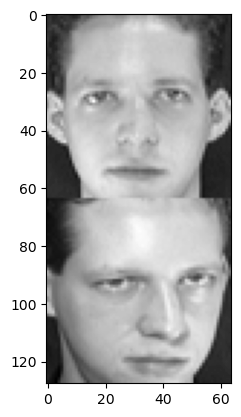

In [35]:
#Probka treningowa
n = 0
print(tab_train[n])
plt.imshow(train_img[n], cmap = 'gray')

1


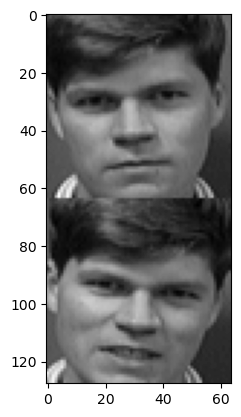

In [34]:
#Probka walidacyjna
n = 0
print(tab_valid[n])
plt.imshow(valid_img[n], cmap = 'gray')

1


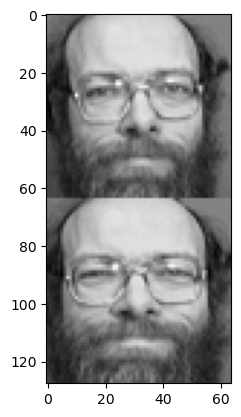

In [36]:
#Probka testowa
n = 0
print(tab_test[n])
plt.imshow(test_img[n], cmap = 'gray')